In [46]:
%pip install pandas matplotlib seaborn numpy openpyxl

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

In [48]:


# Leitrura e Vizualização das Tabelas do database
base_rh = pd.read_excel("Base_RH.xlsx", sheet_name=None)
display(base_rh.keys())

dict_keys(['Metadados', 'Base'])

In [49]:
base = base_rh['Base']
base

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turnover em uma empresa de tecnologia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,1466,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,...,Não,17,1,17,3,Muito bom,5,2,0,3
1472,1467,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,...,Não,15,1,9,5,Muito bom,7,7,1,7
1473,1468,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,...,Sim,20,1,6,0,Muito bom,6,2,0,3
1474,1469,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,...,Não,14,0,17,3,Bom,9,6,0,8


In [50]:
# Retirar culnas duplicadas
base = base.drop_duplicates()

# Retirar linhas com valores nulos
base = base.dropna()

# Promover a primeira linha para o cabeçalho
base.columns = base.iloc[0]

# Remover a primeira linha
base = base[1:]

# Resetar o índice
base = base.reset_index(drop=True)

# Convertendo colunas para numérico, ignorando erros para tratar células não numéricas
colunas_numericas = ['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
                     'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
                     'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
                     'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe']
base[colunas_numericas] = base[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# O mesmo para categóricas
colunas_categoricas = ['Funcionário_deixou_a_empresa', 'Frequência de Viagens', 
                       'Formação', 'E-Sat', 'Gênero', 'Estado_Civil', 'Faz_hora_extras?', 
                       'Equilibrio_de_Vida']
base[colunas_categoricas] = base[colunas_categoricas].astype('category')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            1470 non-null   object  
 1   Funcionário_deixou_a_empresa  1470 non-null   category
 2   Idade                         1470 non-null   int64   
 3   Frequência de Viagens         1470 non-null   category
 4   Distância_do_trabalho         1470 non-null   int64   
 5   Formação                      1470 non-null   category
 6   E-Sat                         1470 non-null   category
 7   Gênero                        1470 non-null   category
 8   Estado_Civil                  1470 non-null   category
 9   Salário                       1470 non-null   int64   
 10  Qte_Empresas_Trabalhadas      1470 non-null   int64   
 11  Faz_hora_extras?              1470 non-null   category
 12  Perc_de_aumento               1470 non-null   in

In [51]:
base

5,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,Não,36,Viaja frequentemente,23,Ensino Técnico,Alto,H,Casado,2571,...,Não,17,1,17,3,Muito bom,5,2,0,3
1466,1467,Não,39,Viaja raramente,6,Ensino Médio,Muito Alto,H,Casado,9991,...,Não,15,1,9,5,Muito bom,7,7,1,7
1467,1468,Não,27,Viaja raramente,4,Ensino Superior,Médio,H,Casado,6142,...,Sim,20,1,6,0,Muito bom,6,2,0,3
1468,1469,Não,49,Viaja frequentemente,2,Ensino Superior,Muito Alto,H,Casado,5390,...,Não,14,0,17,3,Bom,9,6,0,8


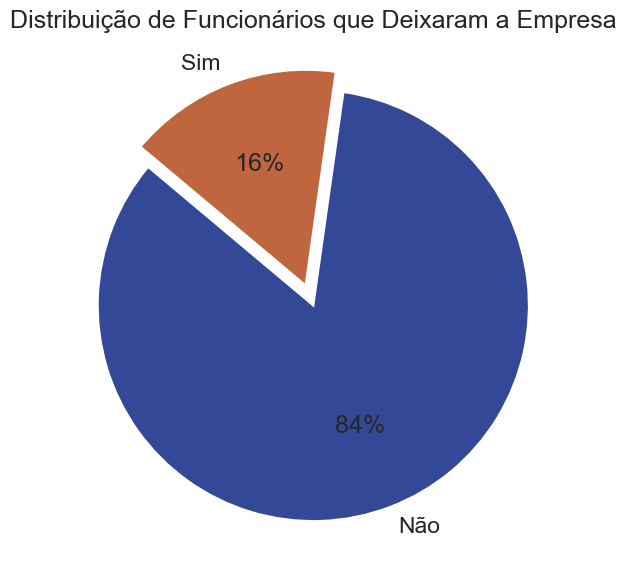

In [52]:
# Vamos analisar a proporção de pessoas que saíram da empresa
churns = base['Funcionário_deixou_a_empresa']
contagem_churns = churns.value_counts()

# Criando a figura
plt.figure(figsize=(7, 7))

# Adicionando título
plt.title('Distribuição de Funcionários que Deixaram a Empresa')

# Definindo a paleta de cores e ajustando a transparência
def apply_transparency(color, alpha=0.8):
    return mcolors.to_rgba(color, alpha=alpha)

palette_color = sns.color_palette("dark", n_colors=2)
transparent_palette = [apply_transparency(color, alpha=0.8) for color in palette_color]

# Criando o parâmetro explode para destacar a fatia 'Sim'
explode = [0.1 if label == 'Sim' else 0 for label in contagem_churns.index]

# Plotando o gráfico de pizza
plt.pie(contagem_churns, 
        labels=contagem_churns.index, 
        colors=transparent_palette, 
        explode=explode,
        autopct='%.0f%%', 
        startangle=140)

# Exibindo o gráfico
plt.show()

In [53]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            1470 non-null   object  
 1   Funcionário_deixou_a_empresa  1470 non-null   category
 2   Idade                         1470 non-null   int64   
 3   Frequência de Viagens         1470 non-null   category
 4   Distância_do_trabalho         1470 non-null   int64   
 5   Formação                      1470 non-null   category
 6   E-Sat                         1470 non-null   category
 7   Gênero                        1470 non-null   category
 8   Estado_Civil                  1470 non-null   category
 9   Salário                       1470 non-null   int64   
 10  Qte_Empresas_Trabalhadas      1470 non-null   int64   
 11  Faz_hora_extras?              1470 non-null   category
 12  Perc_de_aumento               1470 non-null   in

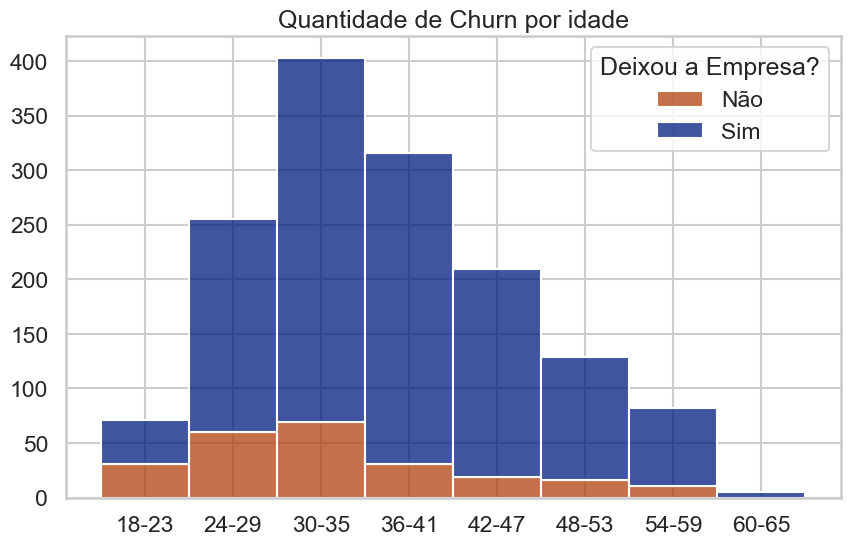

In [54]:
# Criando uma coluna de intervalo de idade
bins = range(18, 72, 6)  # Intervalos de 18 a 72 anos, de 6 em 6 anos
labels = [f'{i}-{i+5}' for i in bins[:-1]]  # Criando rótulos para os intervalos
base['Idade'] = pd.cut(base['Idade'], bins=bins, labels=labels, right=False)

# Plotar o Histograma
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=base, x='Idade', 
                        hue='Funcionário_deixou_a_empresa',
                        palette=palette_color, 
                        bins=bins, multiple='stack',
                        edgecolor='white')

# Remover os títulos dos eixos X e Y
histplot.set_title('Quantidade de Churn por idade')
histplot.set_xlabel('')
histplot.set_ylabel('')

# mudar legenda
histplot.legend(title='Deixou a Empresa?', labels=['Não', 'Sim'])

# Mostrar o gráfico
plt.show()


C:\Users\gafeb\AppData\Local\Temp\ipykernel_10444\1734722638.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(column)['Funcionário_deixou_a_empresa'] \
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10444\1734722638.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=palette_color)
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10444\1734722638.py:25: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=palette_color)


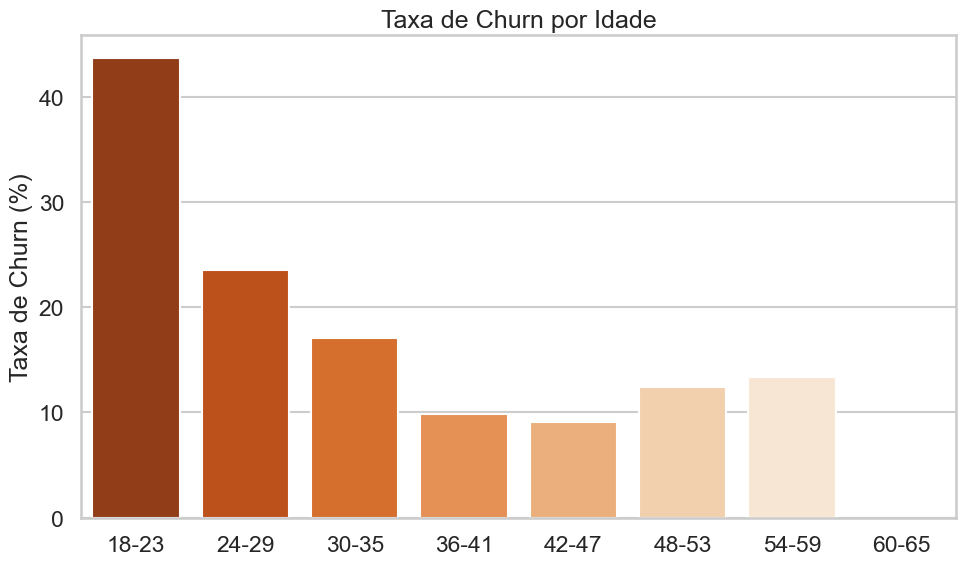

In [55]:
# Função para calcular a taxa de churn (percentual de 'Sim') em cada categoria
def calculate_churn_rate(data, column):
    return data.groupby(column)['Funcionário_deixou_a_empresa'] \
            .value_counts(normalize=True)[:, 'Sim']

# Calculando o percentual de churn em cada categoria
churn_rate = calculate_churn_rate(base, 'Idade')

# Filtrando as faixas de idade que possuem dados (removendo categorias vazias)
churn_rate = churn_rate[churn_rate > 0]

# Convertendo para porcentagem
churn_rate = churn_rate * 100

# Criando a paleta de cores em tons de vermelho
palette_color = sns.color_palette("Oranges", len(churn_rate))[::-1]

# Criando a figura
plt.figure(figsize=(10, 6))

# Adicionando título
plt.title('Taxa de Churn por Idade')

# Plotando o gráfico de barras
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=palette_color)

# Adicionando rótulos nos eixos X e Y
plt.xlabel('')
plt.ylabel('Taxa de Churn (%)')

# Removendo as categorias de idade que não têm dados

plt.tight_layout()

# Mostrando o gráfico
plt.show()



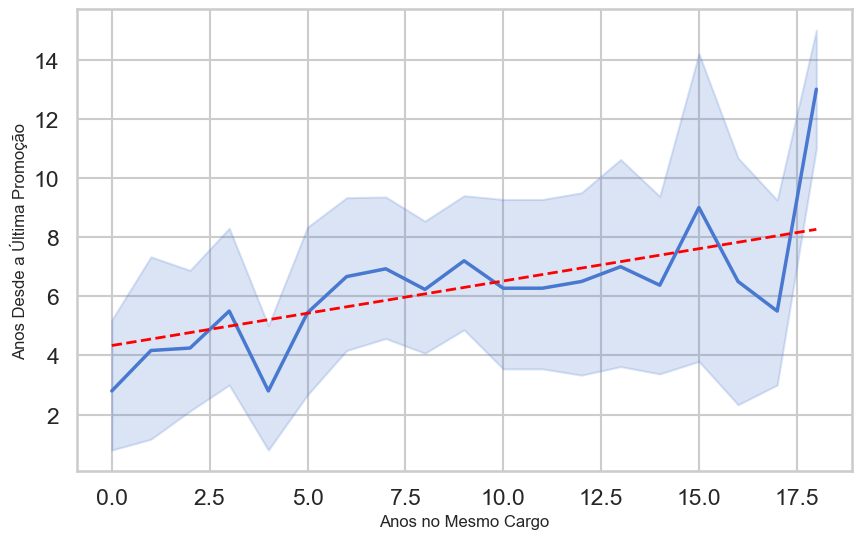

In [56]:


# configurações estéticas para conversar com a paleta de cores "palette_color"
sns.set_context("talk", font_scale=1)
sns.set_style("whitegrid")

# Verificar e converter tipos de dados
base['Anos_no_mesmo_cargo'] = pd.to_numeric(base['Anos_no_mesmo_cargo'], errors='coerce')
base['Anos_desde_a_ultima_promocao'] = pd.to_numeric(base['Anos_desde_a_ultima_promocao'], errors='coerce')

# Agrupar os dados por Anos_no_mesmo_cargo e Anos_desde_a_ultima_promocao
agrupar_data = base.groupby(['Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao']) \
                    .mean(numeric_only=True) \
                    .reset_index()

# Criar grafico de linha
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=agrupar_data, x='Anos_no_mesmo_cargo', y='Anos_desde_a_ultima_promocao', linewidth=2.5)

# Adicionar linha de tendência
sns.regplot(data=agrupar_data, x='Anos_no_mesmo_cargo', y='Anos_desde_a_ultima_promocao', 
            scatter=False, color='red', line_kws={"linewidth": 2,"linestyle" : "--"}, ci=None)

# Adicionar título e rótulos aos eixos X e Y
lineplot.set_title('')
lineplot.set_xlabel('Anos no Mesmo Cargo', fontsize=12)
lineplot.set_ylabel('Anos Desde a Última Promoção', fontsize=12)

# Ajustar o grid
plt.grid(True)

# Mostrar o gráfico
plt.show()

C:\Users\gafeb\AppData\Local\Temp\ipykernel_10444\1088409035.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupar_data = agrupar_data.groupby('Tempo_de_empresa').sum().reset_index()
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10444\1088409035.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=agrupar_data, x='Tempo_de_empresa', y='Percentage', palette=palette_color, ci=None)
C:\Users\gafeb\AppData\Local\Temp\ipykernel_10444\1088409035.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=agrupar_data, x='Tempo_de_empresa', y='Percentage', palette=pale

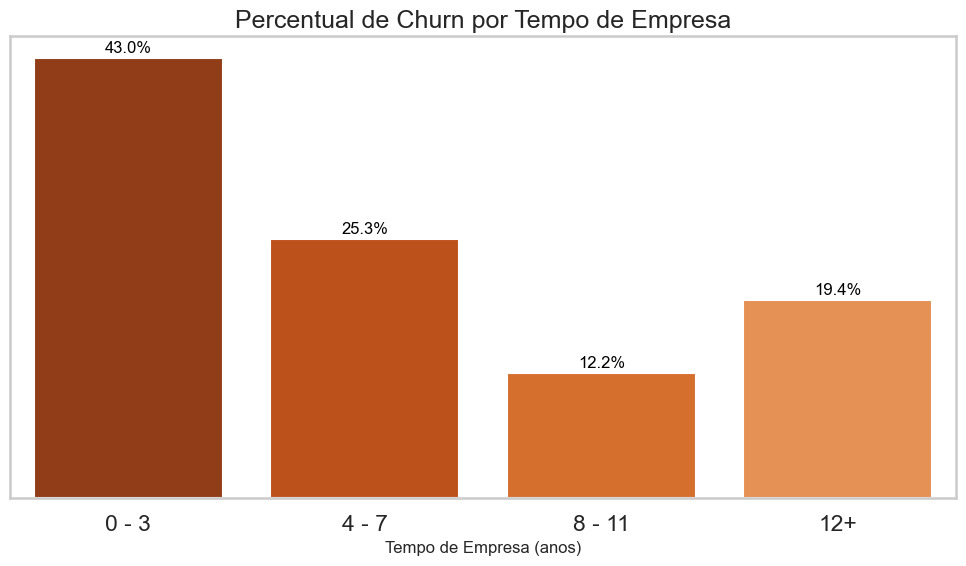

In [91]:
# Filtrar apenas funcionários que deixaram a empresa
agrupar_data = base[base['Funcionário_deixou_a_empresa'] == 'Sim'] \
                    .groupby('Tempo_de_empresa') \
                    .size() \
                    .reset_index(name='Count')

# Certificar-se de que 'Tempo_de_empresa' é numérico e não contém NaN antes de usar pd.cut
agrupar_data['Tempo_de_empresa'] = pd.to_numeric(agrupar_data['Tempo_de_empresa'], errors='coerce')
agrupar_data = agrupar_data.dropna(subset=['Tempo_de_empresa'])  # Remove NaNs antes de usar pd.cut

# Criar intervalos de tempo de empresa de 2 em 2 anos, com o último intervalo 8+
bins = [0, 3, 6, 9, agrupar_data['Tempo_de_empresa'].max() + 1]  # Último intervalo captura tudo acima de 8 anos
labels = ['0 - 3', '4 - 7', '8 - 11', '12+',]

# Agrupar os dados
agrupar_data['Tempo_de_empresa'] = pd.cut(agrupar_data['Tempo_de_empresa'], bins=bins, labels=labels, right=False)

# Somar os dados após o agrupamento
agrupar_data = agrupar_data.groupby('Tempo_de_empresa').sum().reset_index()

# Calcular porcentagens
total_churns = agrupar_data['Count'].sum()
agrupar_data['Percentage'] = (agrupar_data['Count'] / total_churns) * 100

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=agrupar_data, x='Tempo_de_empresa', y='Percentage', palette=palette_color, ci=None)

# Adicionar os valores de porcentagem no topo das barras
for index, row in agrupar_data.iterrows():
    barplot.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", color='black', ha="center", fontsize=12)

# Remover o eixo Y
barplot.set_ylabel('')  # Remover o rótulo do eixo Y
barplot.set_yticks([])  # Remover as marcações do eixo Y

# Adicionar título e rótulo ao eixo X
barplot.set_title('Percentual de Churn por Tempo de Empresa')
barplot.set_xlabel('Tempo de Empresa (anos)', fontsize=12)

# Ajustar rótulos do eixo X para melhorar a visualização
plt.tight_layout()  # Ajustar layout para evitar cortes no gráfico

# Mostrar o gráfico
plt.show()